# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

/home/matt/projects/linear_confidence/deltas/data/loaders/MIMIC_IV.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  desired_df_data['RFD'].replace(-1, 2, inplace=True)
/home/matt/projects/linear_confidence/deltas/data/loaders/MIMIC_IV.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_df_data['RFD'].replace(-1, 2, inplace=True)

MIMIC-IV: 1624107
Number of attribues: 19
Classes total: 1616473 - 7634

Classes train: 808236 - 3817
Classes test:  808237 - 3817


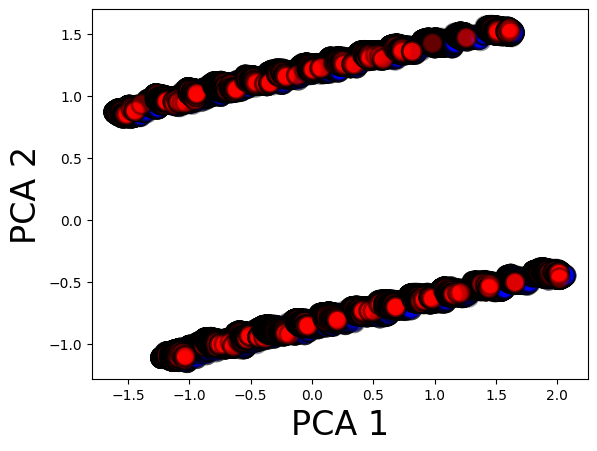

int64


In [2]:
dataset = 'MIMIC-IV' # change ind to select dataset to use
model = 'SVM-rbf'
model = 'MLP-small'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

## Get Classifier

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

fitting MLP


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 1


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 2


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 3


## Fit deltas

In [ ]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

## Plot training data information

In [ ]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [ ]:
deltas_model.print_params()

# Evaluation on test data

In [ ]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])